### Chapter IV - WWW, Wiki and Online social networks.

#### This __exercise__ notebook is taken from the Python 2 notebook for Ch. 4 of Caldarelli-Cheesa's textbook (CC).

The challege questions at the bottom are solved in the `solution` version of this notebook.

In [24]:
import numpy as np

import matplotlib.pyplot as plt

import networkx as nx

#### Get data from The Laboratory for Web Algorithmics

#### This is the page with the datasets: http://law.di.unimi.it/datasets.php

It is possible to download a network in a WebGraph format that is a compressed binary format.

The project provides various clients to extract the network strcture, in Java, C++ and in Python, py-web-graph: http://webgraph.di.unimi.it/.

In particular we got the graph and the related urls associated to each node of the .eu domain in 2005: http://law.di.unimi.it/webdata/eu-2005/.

 We exctracted the graph in a form of an edge list and we also got the file with the list of urls in the same order of the node_id

##### For Colab execution:

Please upload the two data files shown below to your `sample_data` folder in Colab.

In [25]:
ARCSFILE = './sample_data/eu-2005_1M.arcs'

URLSFILE = './sample_data/eu-2005.urls'

In [26]:
#retrieve just the portion of the first 1M edges of the .eu domain
#crawled in 2005
eu_DG = nx.read_edgelist(ARCSFILE, create_using = nx.DiGraph())

#generate the dictionary of node_id -> urls
file_urls = open(URLSFILE)

count = 0

dic_nodid_urls = {}

while True:
    next_line = file_urls.readline()

    if not next_line:
        break

    dic_nodid_urls[str(count)] = next_line[ :-1]
    count = count+1

file_urls.close()

#generate the strongly connected component
scc = [(len(c),c) for c in sorted( nx.strongly_connected_components \
                               (eu_DG), key=len, reverse=True)][0][1]

eu_DG_SCC = eu_DG.subgraph(scc)


In [27]:
l = [e for e in eu_DG_SCC.edges]

What's in the data?

In [28]:
l[ :5]

[('24395', '24255'),
 ('24395', '24289'),
 ('24395', '24290'),
 ('24395', '24291'),
 ('24395', '24292')]

#### Retrieving data through the  [Twitter API](https://dev.twitter.com/docs) usign the [Twython](http://twython.readthedocs.org/en/latest/) module

This part is not in use anymore as the TwitterAPI does not generally serve data anymore: we get a `403` error.

Please proceed to the 'HITS algorithm' section below.

## Hits algorithm

##### Create a simple labeled network: the 'four triangles' network

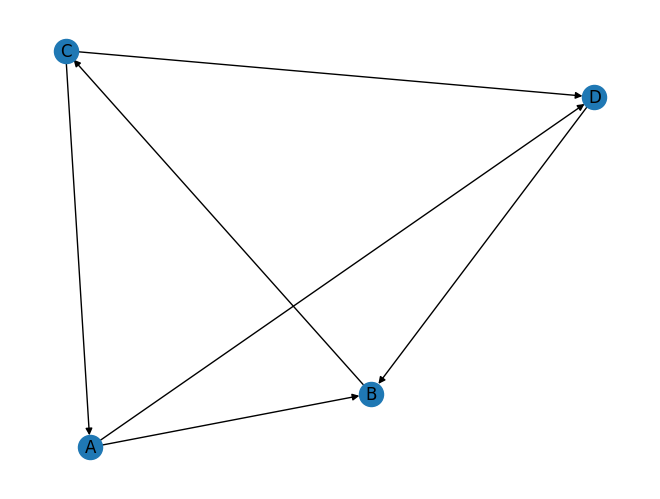

In [29]:
DG = nx.DiGraph()

DG.add_edges_from([('A','B'),('B','C'),('A','D'),
                   ('D','B'),('C','D'),('C','A')])

#plot the graph
nx.draw(DG, with_labels = True)

The network has a certain symmetry: each node has in-degree of 2 and out-degree of 1 or vice versa.


#### Direct implementation of the [HITS algorithm](https://en.wikipedia.org/wiki/HITS_algorithm) by [Kleinberg](https://en.wikipedia.org/wiki/Jon_Kleinberg).

In [30]:
def HITS_algorithm(digraph: nx.DiGraph, K: int = 1000) -> tuple[dict, dict]:
    """
    :param digraph: A networkx DiGraph
    :param K: The K maximum number of iterations

    :return: Two dictionaries containing the hub and authority scores, resp.
    """
    auth_scores = {}
    hub_scores = {}

    for n in digraph.nodes():
        auth_scores[n] = 1.0
        hub_scores[n] = 1.0

    for k in range(K):
        norm = 0.0

        for n in digraph.nodes():
            auth_scores[n] = 0.0

            # REMINDER: a predecessor of a node n is a node m
            # such that there is a direct edge from m to n
            for p in digraph.predecessors(n):
                auth_scores[n] += hub_scores[p]

            norm += auth_scores[n]**2.0

        norm = norm**0.5

        for n in digraph.nodes():
            auth_scores[n] = auth_scores[n] / norm

        norm = 0.0

        for n in digraph.nodes():
            hub_scores[n] = 0.0

            for s in digraph.successors(n):
                hub_scores[n] += auth_scores[s]

            norm += hub_scores[n]**2.0

        norm = norm**0.5

        for n in digraph.nodes():
            hub_scores[n] = hub_scores[n] / norm

        return auth_scores, hub_scores

#### Let's put HITS to test.

In [31]:
auth, hub = HITS_algorithm(DG, K=100)

print (auth)
print (hub)

{'A': 0.31622776601683794, 'B': 0.6324555320336759, 'C': 0.31622776601683794, 'D': 0.6324555320336759}
{'A': 0.7302967433402215, 'B': 0.18257418583505539, 'C': 0.5477225575051661, 'D': 0.36514837167011077}


### Q1.  Use built in hits function to find hub and authority scores.

Can you spot the differences in result?

Hub Scores:  {'A': 0.44504186791262884, 'B': -1.8603208070560393e-17, 'C': 0.35689586789220934, 'D': 0.1980622641951618}
Authority Scores:  {'A': 0.1980622641951616, 'B': 0.35689586789220956, 'C': -3.3521822629371893e-17, 'D': 0.44504186791262884}


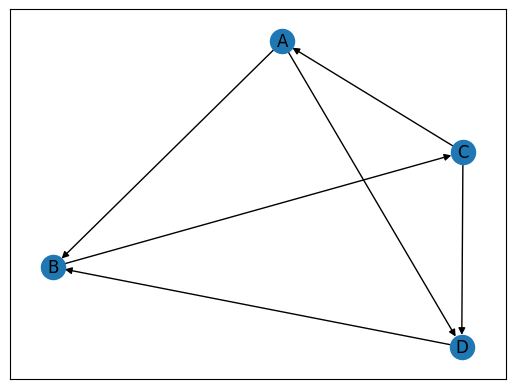

In [32]:
nx.draw_networkx(DG, with_labels = True)

# your solution here.

hubs, authorities = nx.hits(DG, max_iter = 1000, normalized = True)

print("Hub Scores: ", hubs)
print("Authority Scores: ", authorities)

#### Adjacency matrix representation with basic operations

We refrain from using the standard `Numpy` methods for transposing and multiplying matrices.

In [33]:
def matrix_transpose(M: list) -> list:

    M_out=[]

    for c in range(len(M[0])):

        M_out.append([])

        for r in range(len(M)):
            M_out[c].append(M[r][c])

    return M_out


def matrix_multiplication(M1: list, M2: list) -> list:

    M_out=[]

    for r in range(len(M1)):

        M_out.append([])

        for j in range(len(M2[0])):
            e=0.0

            for i in range(len(M1[r])):
                e+=M1[r][i]*M2[i][j]

            M_out[r].append(e)

    return M_out

Now, let's test the home-brew functions.

In [34]:

adjacency_matrix1=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0]
                  ]

adjacency_matrix2 = matrix_transpose(adjacency_matrix1)

print ("Transpose adjacency matrix:", adjacency_matrix2)

res_mul = matrix_multiplication(adjacency_matrix1, adjacency_matrix2)

print ("Matrix multiplication:", res_mul)

Transpose adjacency matrix: [[0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 1, 0]]
Matrix multiplication: [[2.0, 1.0, 1.0], [1.0, 3.0, 0.0], [1.0, 0.0, 1.0]]


Differently from the `Numpy` methods, our functions work with pure lists.

In [35]:
type(res_mul)

list

### The Power-iterations algorithm: a direct implementation

In [36]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]
vector=[
        [0.21],
        [0.34],
        [0.52],
        [0.49]
        ]

# For small examples, few iterations will be needed.
C = 100

In [37]:
for i in range(C):
    res = matrix_multiplication(adjacency_matrix, vector)

    norm_sq = 0.0

    for r in res:
        norm_sq = norm_sq+r[0]*r[0]

    vector = []

    for r in res:
         vector.append([r[0]/(norm_sq**0.5)])

print ("Maximum eigenvalue (in absolute value):", norm_sq**0.5)
print ("Eigenvector for the maximum eigenvalue:", vector)


Maximum eigenvalue (in absolute value): 2.1700864866260337
Eigenvector for the maximum eigenvalue: [[0.5227207256439814], [0.6116284573553772], [0.2818451988548684], [0.5227207256439814]]


#### Putting it all together: computing HITS for the WWW strongly-connected component of the `.eu` domain

In [38]:
# Use operator.itemgetter(1) to sort the dictionary by value
import operator

In [39]:
# Your solution here

#Please assign your results to lists sorted_auth and sorted_hub, respectively.

print(eu_DG_SCC)

(auth,hub) = HITS_algorithm(eu_DG_SCC)

sorted_auth = sorted(auth.items(), key = operator.itemgetter(1))

sorted_hub = sorted(hub.items(), key = operator.itemgetter(1))



DiGraph with 17099 nodes and 380517 edges


In [40]:

#top ranking auth
print ("Top 5 by auth")

for p in sorted_auth[:5]:
    print (dic_nodid_urls[p[0]], p[1])

#top ranking hub
print ("Top 5 by hub")

for p in sorted_hub[:5]:
    print (dic_nodid_urls[p[0]], p[1])

Top 5 by auth
http://ue.eu.int/cms3_applications/Applications/newsRoom/GalleryViewer.asp?command=VIEW_BYDATE&BID=102&TOPIC=NODESCRIPTION&cmsID=245&LANG=8 9.674263879950006e-05
http://ue.eu.int/cms3_Applications/applications/PolJu/details.asp?lang=PT&cmsid=720&id=50 9.674263879950006e-05
http://europa.eu.int/comm/employment_social/news/2005/feb/socdialsite_en.html 9.674263879950006e-05
http://www.etf.eu.int/WebSite.nsf/FichesList?ReadForm&LAN=EN&Key=Mediterranean+Region~~Syria 9.674263879950006e-05
http://ue.eu.int/cms3_Applications/applications/search/jaiDocDetails.asp?cmsid=470&dockey=ST8831%2F02ORI&doclang=PT&lang=PT 9.674263879950006e-05
Top 5 by hub
http://ue.eu.int/showPage.asp?id=370&lang=pt&mode=g 7.657111011209225e-07
http://ue.eu.int/cms3_fo/showPage.asp?id=580&lang=pt&mode=g 7.657111011209225e-07
http://libserver.cedefop.eu.int:4505/ALEPH/-/start/vetir 7.657111011209225e-07
http://leonardo.cec.eu.int/ 7.657111011209225e-07
http://www.etf.eu.int/ 7.657111011209225e-07


### Q2. Run the built-in `nx.hits` function; can you spot the differences in result?

In [41]:
# Your solution here

#Please assign your results to lists sorted_auth and sorted_hub, respectively.

hub, auth= nx.hits(eu_DG_SCC, max_iter = 50, normalized = True) #normalized True  normalized the result by the sum of all the values

#(auth,hub)=HITS_algorithm(eu_DG_SCC)
sorted_auth = sorted(auth.items(), key = operator.itemgetter(1))

sorted_hub = sorted(hub.items(), key = operator.itemgetter(1))


In [42]:

print ("Top-5 auth nodes:")

for p in sorted_auth[:5]:
    print (dic_nodid_urls[p[0]], p[1])

print ("Top-5 hub nodes:")

for p in sorted_hub[:5]:
    print (dic_nodid_urls[p[0]], p[1])

Top-5 auth nodes:
http://ue.eu.int/cms3_applications/applications/solana/list.asp?BID=112&lang=PT&cmsid=425 -6.705774476296594e-21
http://ue.eu.int/cms3_applications/applications/search/jaiShowTopic.asp?topic=16&lang=PT&cmsid=467 -6.702592695168336e-21
http://www.europa.eu.int/scadplus/leg/de/lvb/l60024.htm -6.522063801718138e-21
http://www.europa.eu.int/scadplus/leg/nl/lvb/l60024.htm -6.522063801718138e-21
http://ue.eu.int/cms3_applications/Applications/codec/search.asp?lang=PT&cmsid=449 -6.350984647154648e-21
Top-5 hub nodes:
http://www.europa.eu.int/scadplus/leg/it/lvb/l60024.htm -2.6218605804248327e-23
http://www.europa.eu.int/scadplus/leg/nl/lvb/l60024.htm -2.6218605804248327e-23
http://ue.eu.int/cms3_fo/showPage.asp?id=425&lang=pt&mode=g -1.2610463696318956e-23
http://ue.eu.int/cms3_applications/showPage.asp?id=425&lang=pt&mode=g -1.2610463696318956e-23
http://ue.eu.int/showPage.asp?id=425&lang=pt&mode=g -1.2610463696318956e-23


#### Compute the PageRank

In [43]:
def pagerank(graph, damping_factor = 0.85, max_iterations = 100, min_delta = 0.00000001):

    nodes = graph.nodes()

    graph_size = len(nodes)

    if graph_size == 0:
        return {}

    # itialize the page rank dict with 1/N for all nodes
    page_rank = dict.fromkeys(nodes, (1.0-damping_factor)*1.0/ graph_size)

    min_value = (1.0-damping_factor)/len(nodes)

    for _ in range(max_iterations):
        #total difference compared to last iteraction
        diff = 0

        # computes each node PageRank based on inbound links
        for node in nodes:
            rank = min_value

            for referring_page in graph.predecessors(node):
                rank += damping_factor * page_rank[referring_page]/ \
                len(list(graph.neighbors(referring_page)))

            diff += abs(page_rank[node] - rank)

            page_rank[node] = rank

        #stop if PageRank has converged
        if diff < min_delta:
            break

    return page_rank

#### The Networkx version of [PageRank](http://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)

{1: 0.17359086186340225, 2: 0.33260446516778386, 3: 0.3202137953926163, 4: 0.17359086304186191}
{1: 0.17359061775974502, 2: 0.33260554622228633, 3: 0.3202132182582236, 4: 0.17359061775974502}


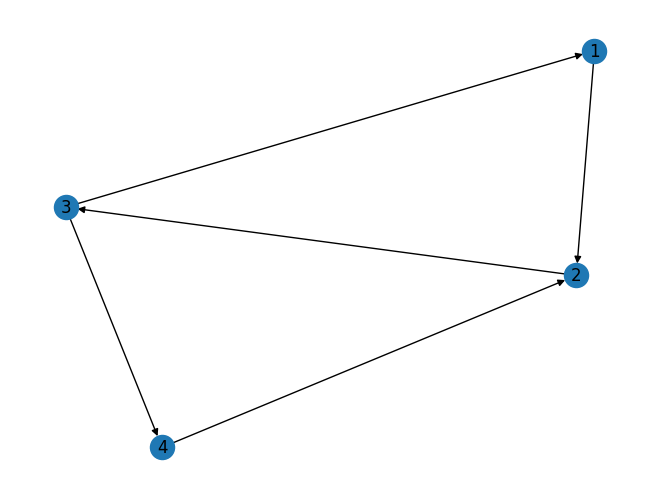

In [44]:
G = nx.DiGraph()

G.add_edges_from([(1, 2), (2, 3), (3, 4), (3, 1), (4, 2)])
#plot the network

nx.draw(G, with_labels = True)

#our Page Rank algorithm
res_pr=pagerank(G, max_iterations = 10000, min_delta = 0.00000001, damping_factor = 0.85)
print (res_pr)

#Networkx Pagerank function
print (nx.pagerank(G,max_iter = 10000))

#### The Twitter Mention Network

Please skip this section as we don't access Twitter/X data anymore; proceed to he `Scwiki` section below.

#### Community Detection for the `Scwiki` network

Wikipedia is public and very connected, both internally (Wikipedia links) and externally (links to other sites).

It is interesting to see whether the links connecting two pages (lemmata of the encyclopedia) determine some community of concepts and, ultimately, a bottom-up, data/user-driven taxonomy of concepts, as in *curated* scientific taxonomies etc.

The present shape of the Wikipedia is available from [dumps.wikimedia.org](https://dumps.wikimedia.org/).

The data presented here is a tiny fragment of the *Sardininan* Wikipedia, which is developed for the spoken language of [Sardinia](https://en.wikipedia.org/wiki/Sardinia): 

[sc.wikipedia.org/](https://sc.wikipedia.org/)


#### References:

- for the structure of the *PageLinks* table files: [www.mediawiki.org/wiki?Manual:Page_links_table](https://www.mediawiki.org/wiki?Manual:Page_links_table)

- for the structure of the Page table files: [www.mediawiki.org/wiki?Manual:Page_table](https://www.mediawiki.org/wiki?Manual:Page_table)

In [47]:
SCWIKI = './sample_data/scwiki_edgelist.dat'

TITLES = './sample_data/scwiki_page_titles.dat'

Warning: in `.eu` there are pages in the Sardinian language (and perhaps others) which require a specific coding on your own platform.

In [ ]:
#load the directed and undirected version of the scwiki graph
scwiki_pagelinks_net_dir = nx.read_edgelist(SCWIKI, create_using = nx.DiGraph())

scwiki_pagelinks_net = nx.read_edgelist(SCWIKI)

#load the page titles
dict_titles = {}

file_titles = open(TITLES, 'r', encoding='utf-8')

while True:
    next_line = file_titles.readline()

    if not next_line:
        break

    print (next_line.split()[0], next_line.split()[1])

    dict_titles[next_line.split()[0]] = next_line.split()[1]

file_titles.close()

14209 "Weird_Al"_Yankovic
13890 ''Assandira''
10258 'O_sole_mio
2361 'Onne
6118 (Sittin'_on)_The_Dock_of_the_Bay
6119 (Sittin'_on)_the_Dock_of_the_Bay
10062 ...altrimenti_ci_arrabbiamo!
11039 1054
11019 1065
16053 1082
11222 1090
12579 1096
11596 1100
16054 1110
16055 1138
11307 113_(nùmeru_de_emerzèntzia)
16056 1166
10560 118_-_Servìtziu_de_emerzèntzia_sanidària
16057 1194
11598 1200
16058 1222
16059 1250
16060 1278
16061 1306
15041 1315
10934 1324
16062 1334
13534 1336
12350 1340
15040 1343
16063 1362
15039 1371
16064 1390
15038 1399
11590 1409
16065 1418
15037 1427
11067 1431
12108 1444
16066 1446
15036 1455
11054 1473
16067 1474
13112 1483
10971 1489
13533 1490
11055 1492
12135 1497
16068 1502
11221 1510
10965 1514
11099 1515
13113 1520
13500 1530
12079 1533
13499 1542
13516 1543
12078 1580
12130 1584
10970 1588
10967 1596
10961 1599
13498 1600
11321 1608
13204 1616
13497 1627
10963 1667
10968 1669
11049 1685
13535 1711
12362 1713
11100 1720
13519 1724
11048 1750
12361 1753
11094 1